In [411]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [412]:
def fit_predict(X, y, num_steps=1000,learning_rate = np.float64(0.001), store_per_num=50 ):
    
    i, n = X.shape
    movement_line = list()
    mse_result = list()
    intercept_lst = list()
    slope_lst = list()
    a = 0 #intercept
    b = np.zeros(n) #slope
    
    for _ in range(num_steps):
        
        # Partial derivative with respect to the slope
        dfdb = (1/len(X)) * np.dot(X.T, (y_hat(X, a, b) - y))
        # Partial derivative with respect to the intercept
        dfda = (1/len(X)) * sum(y_hat(X, a, b) - y)

        # a is the intercept and b is the slope
        b = b - learning_rate * dfdb
        a = a - learning_rate * dfda

        #   Stored in the list in order to visualize every move
        if _ % store_per_num == 0:
            intercept_lst.append(dfda)
            slope_lst.append(dfdb)
            movement_line.append(y_hat(X=X, a=a, b=b))
            mse_result.append(mse(X, square_diff( y, y_hat(X=X, a=a, b=b))))
            
            
    return movement_line, mse_result, intercept_lst, slope_lst

# yhat is the predicted value
def y_hat(X, a, b):
    return a + np.dot(X , b)

# The square difference of predicted value and actual value
def square_diff( y, y_hat):
    return (y - y_hat)**2

# The square difference of predicted value and actual value
def mse(X, square_diff):
    return (1/len(X)) * sum(square_diff)


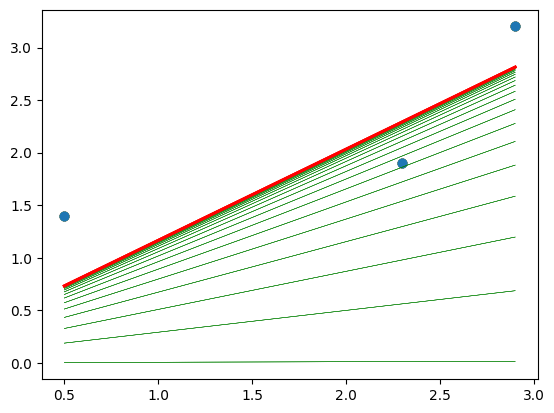

In [407]:
weight = [0.5, 2.3, 2.9]
height = [1.4, 1.9, 3.2]

weight_height_dt = {
    "weight":weight,
    "height":height
}

weight_height_dt = pd.DataFrame(weight_height_dt)
weight_height_dt

y_pred_test, mse, intercept_out, slope_out = fit_predict(np.array([weight_height_dt["weight"]]).T, np.array([weight_height_dt["weight"]]).T)
plt.scatter(x=weight_height_dt["weight"] , y=weight_height_dt["height"])

for i in range (len(y_pred_test)):
    plt.scatter(x=weight_height_dt["weight"] , y=weight_height_dt["height"])
    if i < (len(y_pred_test)-1):
        plt.plot(weight_height_dt["weight"], y_pred_test[i], color='green', linewidth=0.3)
    else:
        plt.plot(weight_height_dt["weight"], y_pred_test[i], color='red', linewidth=2)

In [389]:
# Todo planning to graph the gradient descent

In [390]:
slope_lst = list()

for i in slope_out:
    for j in range(len(i)):
        slope_lst.append(i[j][0])
    
slope_lst

[np.float64(-4.6499999999999995),
 np.float64(-3.543253523085543),
 np.float64(-2.7014619177775776),
 np.float64(-2.0611803731964464),
 np.float64(-1.574156404851033),
 np.float64(-1.2036919390776124),
 np.float64(-0.9218765234327805),
 np.float64(-0.7074830654478268),
 np.float64(-0.5443674523978468),
 np.float64(-0.4202513940267315),
 np.float64(-0.3257967226392641),
 np.float64(-0.2539013589247882),
 np.float64(-0.19916386400333896),
 np.float64(-0.15747620846867402),
 np.float64(-0.12571405591408877),
 np.float64(-0.10150121037244572),
 np.float64(-0.08303046856918771),
 np.float64(-0.06892737043612959),
 np.float64(-0.05814657557824765),
 np.float64(-0.04989305316619903)]

In [391]:
intercept_lst = list()

for i in intercept_out:
    intercept_lst.append(i[0])

intercept_lst

[np.float64(-1.8999999999999997),
 np.float64(-1.4292333431105964),
 np.float64(-1.0713450317112967),
 np.float64(-0.7993040860952721),
 np.float64(-0.5925523092724626),
 np.float64(-0.4354543308497774),
 np.float64(-0.3161187994402126),
 np.float64(-0.2255018493235293),
 np.float64(-0.15672524868824894),
 np.float64(-0.10455782235264643),
 np.float64(-0.06502105167562522),
 np.float64(-0.03508911650523653),
 np.float64(-0.01246076431605836),
 np.float64(0.004614193019479036),
 np.float64(0.017466835819328026),
 np.float64(0.02710949519186053),
 np.float64(0.03431208002116315),
 np.float64(0.03966012688658482),
 np.float64(0.04359894949595566),
 np.float64(0.04646721620739528)]

In [392]:
def fun_y(x):
    return x ** 2

In [393]:
con_slope = slope_lst.copy()
con_slope.sort(reverse=True)

reversed_slope = [-i for i in con_slope]

X_slope = slope_lst + reversed_slope


X_slope = np.array(X_slope)
y_slope = fun_y(X_slope)
y_slope

array([2.16225000e+01, 1.25546455e+01, 7.29789649e+00, 4.24846453e+00,
       2.47796839e+00, 1.44887428e+00, 8.49856324e-01, 5.00532288e-01,
       2.96335923e-01, 1.76611234e-01, 1.06143504e-01, 6.44659001e-02,
       3.96662447e-02, 2.47987562e-02, 1.58040239e-02, 1.03024957e-02,
       6.89405871e-03, 4.75098240e-03, 3.38102425e-03, 2.48931675e-03,
       2.48931675e-03, 3.38102425e-03, 4.75098240e-03, 6.89405871e-03,
       1.03024957e-02, 1.58040239e-02, 2.47987562e-02, 3.96662447e-02,
       6.44659001e-02, 1.06143504e-01, 1.76611234e-01, 2.96335923e-01,
       5.00532288e-01, 8.49856324e-01, 1.44887428e+00, 2.47796839e+00,
       4.24846453e+00, 7.29789649e+00, 1.25546455e+01, 2.16225000e+01])

In [394]:
con_inter = intercept_lst.copy()
con_inter.sort(reverse=True)

reversed_inter = [-i for i in con_inter]

X_inter = intercept_lst + reversed_inter


X_inter = np.array(X_inter)
y_inter = fun_y(X_inter)
X_inter

array([-1.9       , -1.42923334, -1.07134503, -0.79930409, -0.59255231,
       -0.43545433, -0.3161188 , -0.22550185, -0.15672525, -0.10455782,
       -0.06502105, -0.03508912, -0.01246076,  0.00461419,  0.01746684,
        0.0271095 ,  0.03431208,  0.03966013,  0.04359895,  0.04646722,
       -0.04646722, -0.04359895, -0.03966013, -0.03431208, -0.0271095 ,
       -0.01746684, -0.00461419,  0.01246076,  0.03508912,  0.06502105,
        0.10455782,  0.15672525,  0.22550185,  0.3161188 ,  0.43545433,
        0.59255231,  0.79930409,  1.07134503,  1.42923334,  1.9       ])

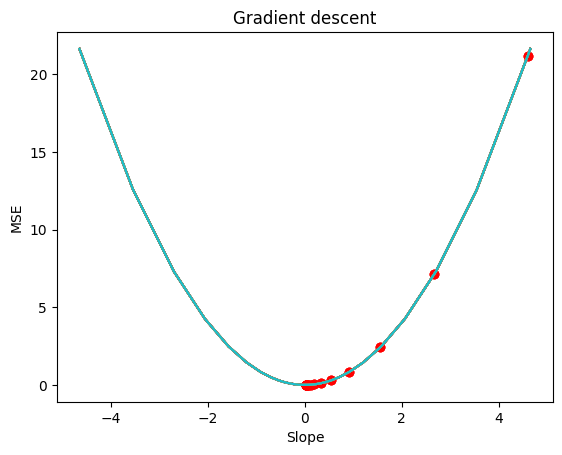

In [395]:
for i in range(len(mse)):

    mse_pos = (mse[i],fun_y(mse[i]) )
    plt.plot(X_slope,y_slope)
    plt.scatter(mse_pos[0], mse_pos[1], color="red")
    plt.title('Gradient descent')
    plt.xlabel('Slope')
    plt.ylabel('MSE')

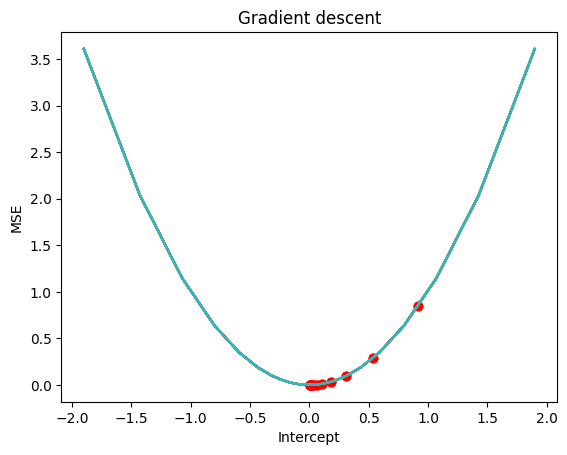

In [396]:
# TODO: Try to fix this vizualization

for i in range(len(mse)):

    mse_pos = (mse[i]/5,fun_y(mse[i])/5 )
    plt.plot(X_inter,y_inter)
    plt.scatter(mse_pos[0], mse_pos[1]/5, color="red")
    plt.title('Gradient descent')
    plt.xlabel('Intercept')
    plt.ylabel('MSE')

In [397]:
W_grid, B_grid = np.meshgrid(slope_lst, intercept_lst)
W_grid.shape

(20, 20)

In [400]:
mse_lst = list()

for i in mse:
    mse_lst.append(i[0])

mse_lst

[np.float64(4.599672727624999),
 np.float64(2.6723468763484997),
 np.float64(1.5573111324612097),
 np.float64(0.9121284751116734),
 np.float64(0.5387246973428181),
 np.float64(0.32252865178914236),
 np.float64(0.1972694483322091),
 np.float64(0.12461427374363367),
 np.float64(0.08239039784169423),
 np.float64(0.057772487582200445),
 np.float64(0.04334197930473699),
 np.float64(0.03480772116761055),
 np.float64(0.029687535763069872),
 np.float64(0.02654560297144045),
 np.float64(0.02455134312768111),
 np.float64(0.023224264000977678),
 np.float64(0.022286373890081597),
 np.float64(0.021576813647703356),
 np.float64(0.021002477688287474),
 np.float64(0.020509451923290345)]

In [402]:
j = (np.array(mse_lst) * np.array(mse_lst).reshape(-1, 1))/5
j.shape

(20, 20)

Text(0.5, 0.92, 'Gradient Descent Path')

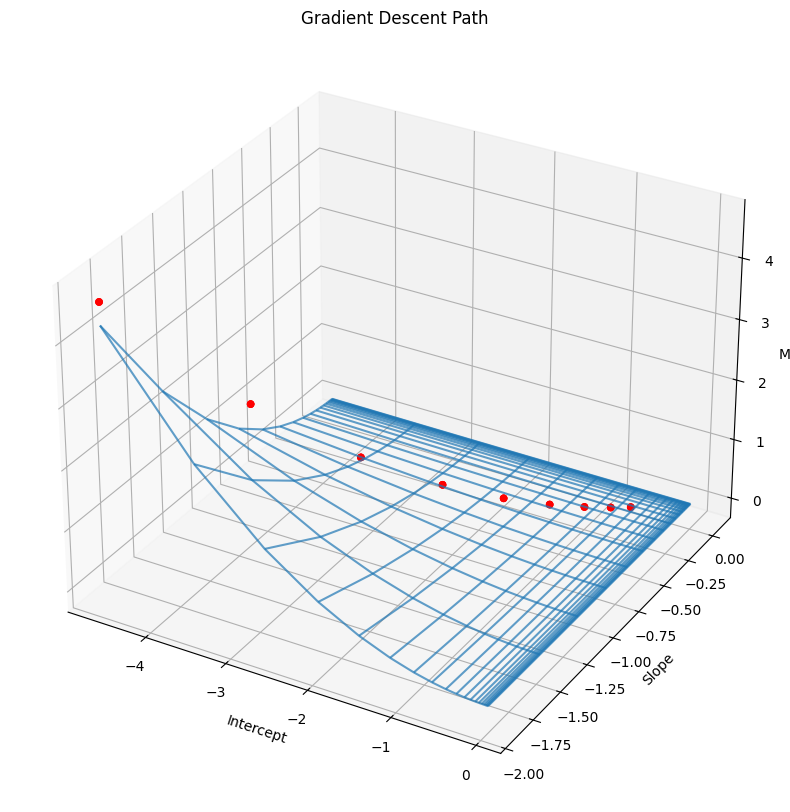

In [403]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')

# Plot the wireframe using the grid
wave = ax.surf = ax.plot_wireframe(W_grid, B_grid, j, cmap = plt.cm.cividis, alpha=0.7 )

for i in range(9):
    ax.scatter(slope_lst[i], intercept_lst[i], mse[i], marker='o',color="red")

# Add labels and title
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('MSE')
ax.set_title('Gradient Descent Path')

In [413]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]


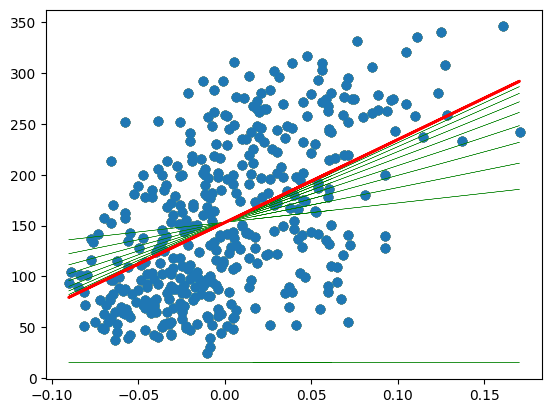

In [414]:
y_pred_test_dia, mse_dia, intercept_out_dia, slope_out_dia = fit_predict(diabetes_X_train, diabetes_y_train, num_steps=10000, learning_rate=0.1, store_per_num=1000)
plt.scatter(x=diabetes_X_train, y= diabetes_y_train)

for i in range (len(y_pred_test_dia)):
    plt.scatter(x=diabetes_X_train, y=diabetes_y_train)
    if i < (len(y_pred_test_dia)-1):
        plt.plot(diabetes_X_train, y_pred_test_dia[i], color='green', linewidth=0.3)
    else:
        plt.plot(diabetes_X_train, y_pred_test_dia[i], color='red', linewidth=2)